In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


         Komoditas    Tanggal  Harga
0     Bawang Merah 2019-01-02  27000
1     Bawang Merah 2019-01-03  27000
2     Bawang Merah 2019-01-04  26250
3     Bawang Merah 2019-01-07  25750
4     Bawang Merah 2019-01-08  25750
...            ...        ...    ...
2485    Telur Ayam 2019-12-23  22500
2486    Telur Ayam 2019-12-26  22500
2487    Telur Ayam 2019-12-27  22500
2488    Telur Ayam 2019-12-30  22150
2489    Telur Ayam 2019-12-31  22150

[2490 rows x 3 columns]


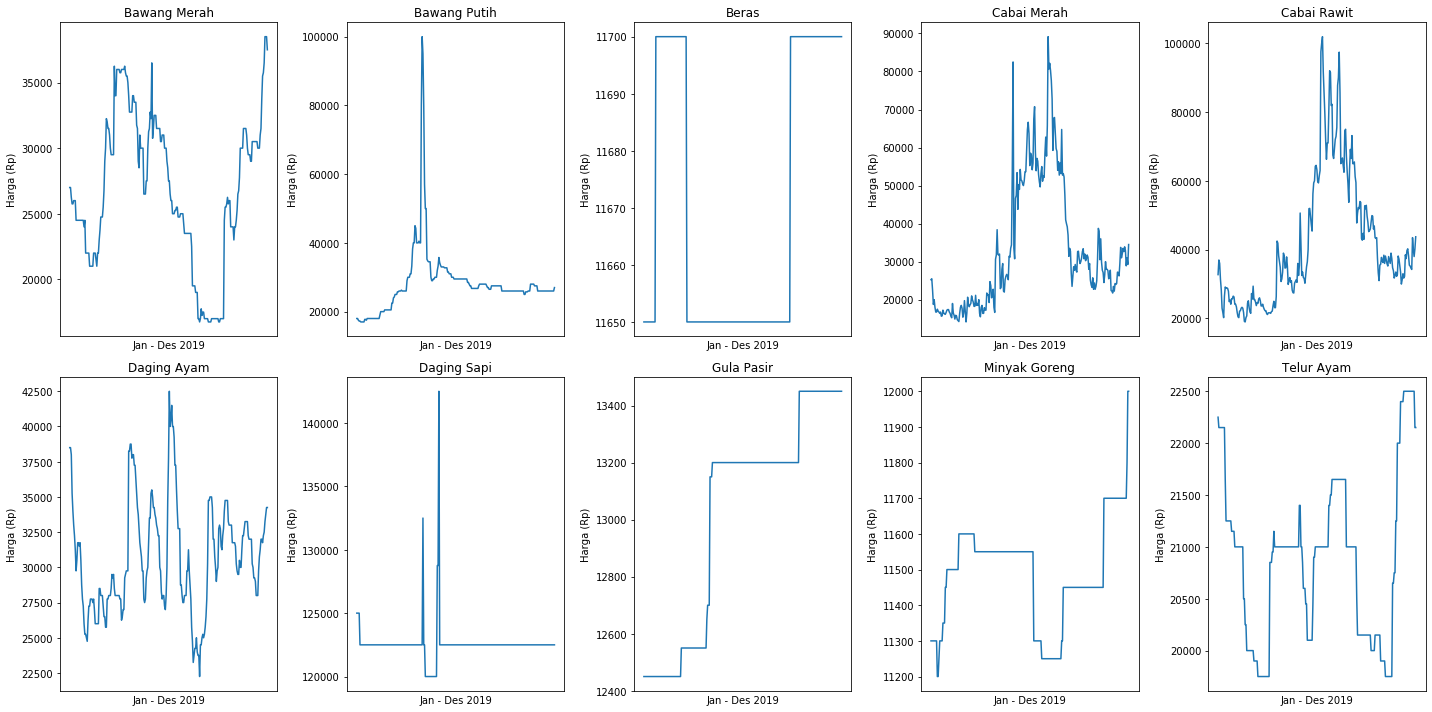

In [32]:

df = pd.read_csv('Jambi 2019.csv')
df = df.drop(columns='Unnamed: 0')
df = df.drop(columns='No.')
df.rename(columns={'Komoditas(Rp)' : 'Komoditas'}, inplace=True)

#print(df[['Komoditas', 'No.']])
#print(df.dtypes)
df = df.drop([1, 2, 3, 4, 5, 6, 8, 10, 11, 13, 15, 17, 19, 20, 22, 23, 25, 26, 27, 29, 30]).reset_index(drop=True)

#df.drop
#print(df.head())
df_melt = pd.melt(frame=df, id_vars=['Komoditas'], var_name="Tanggal", value_name='Harga')
#you have to change the dtype of Tanngal to datetime, and remember python use american date format, we 
#to use indonesia format so dayfirst = True, and datetime object for python pandas always yyyy-mm-dd, so dont worry
df_melt['Tanggal'] = pd.to_datetime(df_melt['Tanggal'], dayfirst=True)
df_melt=df_melt.sort_values(by=['Komoditas', 'Tanggal']).reset_index(drop=True)
df_melt['Harga'] = pd.to_numeric(df_melt['Harga'], downcast='integer')
#print(df_melt)
df_pivot = df_melt.pivot(columns='Komoditas', index='Tanggal', values='Harga').reset_index()
df_pivot['Hari'] = df_pivot['Tanggal'].dt.day
#df_pivot.Tanggal.str.split('/', expand=True)[0]
#print(df_pivot)

list_ax = [0, 'ax1', 'ax2', 'ax3', 'ax4', 'ax5', 'ax6', 'ax7', 'ax8', 'ax9', 'ax10']
columns_df = [0, 'Bawang Merah', 'Bawang Putih', 'Beras', 'Cabai Merah',
       'Cabai Rawit', 'Daging Ayam', 'Daging Sapi', 'Gula Pasir',
       'Minyak Goreng', 'Telur Ayam']
plt.figure(figsize=(20, 10))
for i in range(1, 11):
    list_ax[i] = plt.subplot(2, 5, i)
    plt.plot(range(len(df_pivot)), df_pivot[columns_df[i]])
    #list_ax[i].set_xticks(range(52))
    #list_ax[i].set_xticklabels(range(1, 13))
    plt.ylabel('Harga (Rp)')
    plt.title(columns_df[i])
    plt.xticks(rotation=90)
    plt.xlabel('Jan - Des 2019')
    plt.xticks([])
plt.subplots_adjust(top=0.946, bottom=0.059, left=0.059, right=0.989, hspace=0.228, wspace=0.556)
plt.tight_layout()
plt.savefig('tes33.png')
plt.show()

In [33]:
#Agregat
df_mean = df_melt.groupby('Komoditas').Harga.mean().round(2).reset_index()
df_mean.rename(columns={'Harga': 'Mean'}, inplace=True)
df_median = df_melt.groupby('Komoditas').Harga.median().reset_index()
df_median.rename(columns={'Harga': 'Median'}, inplace=True)
#df_mode = df_melt.groupby('Komoditas').apply(lambda x: mode(x)[0][0]).reset_index()
#df_mode.rename(columns={'Harga': 'Mode'}, inplace=True)
df_std = df_melt.groupby('Komoditas').Harga.std().round(2).reset_index()
df_std.rename(columns={'Harga': 'STD'}, inplace=True)
df_max = df_melt.groupby('Komoditas').Harga.max().reset_index()
df_max.rename(columns={'Harga': 'Max'}, inplace=True)
df_min = df_melt.groupby('Komoditas').Harga.min().reset_index()
df_min.rename(columns={'Harga': 'Min'}, inplace=True)
#df_agregat = df_melt.groupby('Komoditas').Harga.mean().reset_index()
all_df_aggregate = df_mean.merge(df_median).merge(df_std).merge(df_max).merge(df_min)
all_df_aggregate['No.'] = range(1, len(all_df_aggregate)+1)
all_df_aggregate = all_df_aggregate[['No.', 'Komoditas', 'Mean', 'Median', 'Max', 'Min', 'STD']]
all_df_aggregate

,No.,Komoditas,Mean,Median,Max,Min,STD
0,1,Bawang Merah,26744.98,26250,38500,16750,5775.60
1,2,Bawang Putih,28098.39,26750,100000,17000,9815.30
2,3,Beras,11670.88,11650,11700,11650,24.71
3,4,Cabai Merah,33237.15,28000,89150,14150,16875.94
4,5,Cabai Rawit,41771.29,36000,101900,19000,18916.40
5,6,Daging Ayam,30662.65,30000,42500,22250,3908.37
6,7,Daging Sapi,122560.24,122500,142500,120000,1675.21
7,8,Gula Pasir,13020.28,13200,13450,12450,382.85
8,9,Minyak Goreng,11491.16,11550,12000,11200,143.13
9,10,Telur Ayam,20881.73,21000,22500,19750,793.25


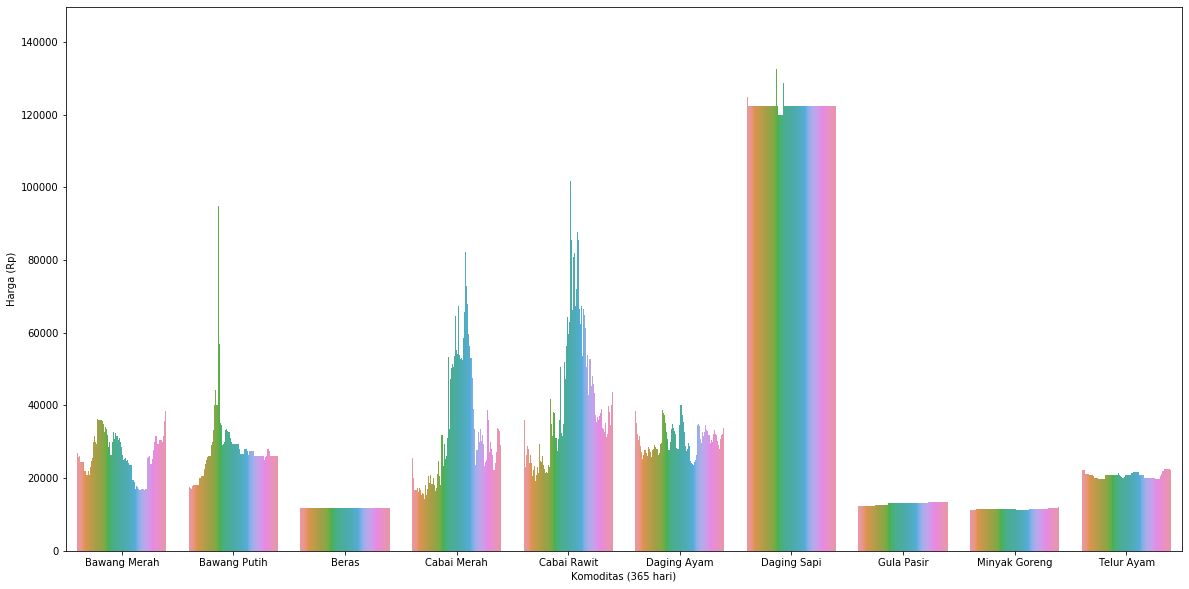

In [34]:
#bar
f, ax = plt.subplots(figsize=(20, 10)) 
ax = sns.barplot(data=df_melt, x='Komoditas', y='Harga', hue='Tanggal')
plt.ylabel('Harga (Rp)')
plt.xlabel('Komoditas (365 hari)')
ax.get_legend().remove()
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#plt.savefig('Bar.png')
plt.show()

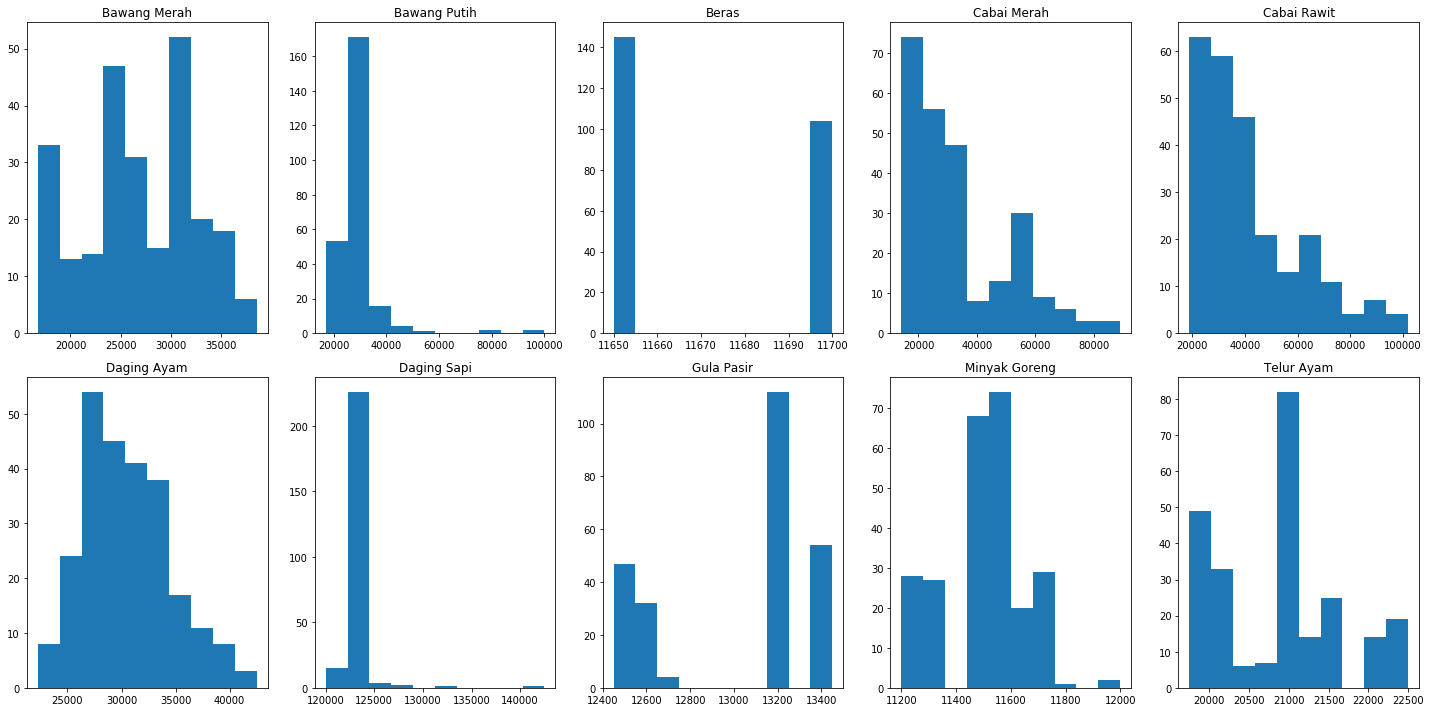

In [35]:
#histogram

list_ax2 = [0, 'ax1', 'ax2', 'ax3', 'ax4', 'ax5', 'ax6', 'ax7', 'ax8', 'ax9', 'ax10']
columns_df2 = [0, 'Bawang Merah', 'Bawang Putih', 'Beras', 'Cabai Merah',
       'Cabai Rawit', 'Daging Ayam', 'Daging Sapi', 'Gula Pasir',
       'Minyak Goreng', 'Telur Ayam']
plt.figure(figsize=(20, 10))
for i in range(1, 11):
    list_ax2[i] = plt.subplot(2, 5, i)
    plt.hist(df_pivot[columns_df2[i]])#, bins=range(len(df_pivot['Bawang Merah'])))
    #list_ax[i].set_xticks(range(len(df_pivot)))
    #list_ax[i].set_xticklabels(df_pivot['Hari'])
    plt.title(columns_df2[i])
    #plt.xticks(rotation=90)
    
plt.subplots_adjust(top=0.946, bottom=0.059, left=0.059, right=0.989, hspace=0.228, wspace=0.556)
plt.tight_layout()
plt.savefig('tes2.png')
plt.show()

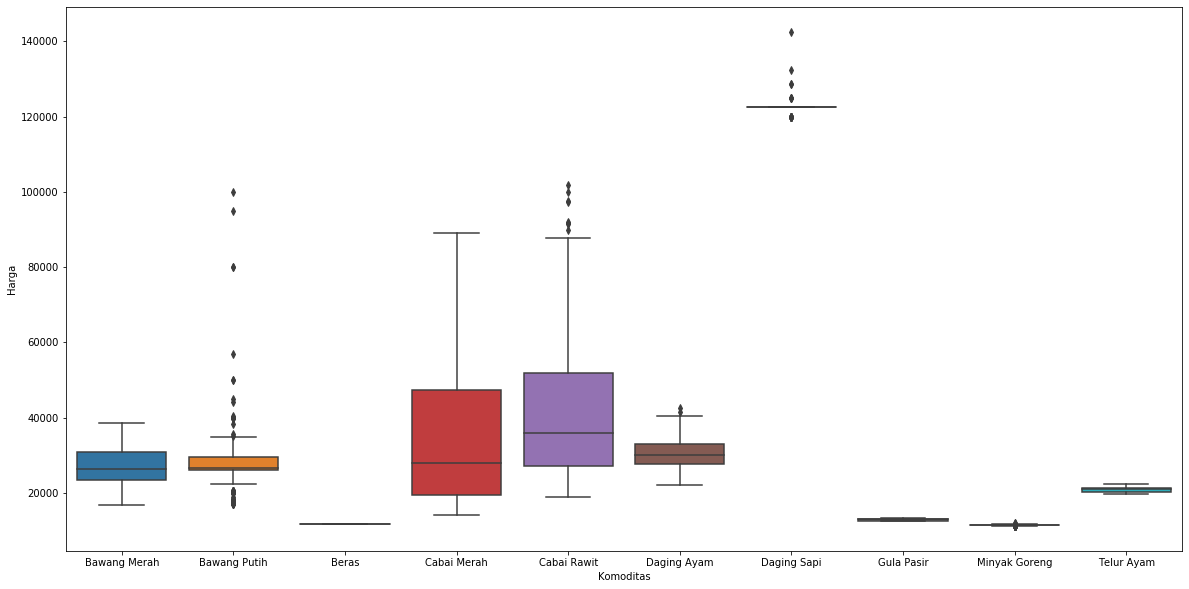

In [36]:
#Boxplot
plt.figure(figsize=(20, 10))
ax = plt.subplot()
sns.boxplot(data=df_melt, x='Komoditas', y='Harga')
plt.show()